In [0]:
# Healthcare Regression model using Synthetic data

In [0]:
# Build Regression model on health data
# Build synthetic data generator

In [0]:
import math
import torch
import torch.nn as nn
from torch.nn import functional as F
import pandas as pd
import numpy as np


In [0]:
# 1. Get disease params for BP, Diabetes, Cholesterol, Thyroid
# 2. Generate data within params - healthy, risky on a spectrum
# 3. Train a model to predict disease
# 4. Look for correlation, cross params
# 5. Start with numbers
# 6. Add image, voice/text
# 7. See how to download html, pdf content and analyze
# 8. 
# 9. 

In [0]:
# 1. Get disease params for BP, Diabetes, Cholesterol, Thyroid

In [0]:
# Thyroid params
# T3, T4, TSH
# TSH 0.3 - 4.0 mU/L,  milliunits per liter
# T3 Total 80 - 215 ng/dL, nanograms per deciliter. Free  1.5-6.0 pg/mL picograms per milliliter
# T4 Total 4.5-12.5 ug/d micrograms. Free 0.8-2.0 ng/dL

In [0]:
sd = np.std([60,80,100,120,140,160,180,200,220,240])
mean = np.mean([60,80,100,120,140,160,180,200,220,240])
print(mean,sd)

150.0 57.445626465380286


In [0]:
sd = np.std([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
mean = np.mean([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
print(mean,sd)

7.5 4.031128874149275


In [0]:
sd = np.std([1,2,3,4,5,6])
mean = np.mean([1,2,3,4,5,6])
print(mean,sd)

3.5 1.707825127659933


In [0]:
# 2. Generate data within params - healthy, risky on a spectrum

In [0]:
t3 = pd.DataFrame(np.random.normal((215+80)/2,60,1000000), columns=['T3'])
t4 = pd.DataFrame(np.random.normal((12.5+4.5)/2,4,1000000), columns=['T4'])
tsh = pd.DataFrame(np.random.normal((4+.3)/2,1.7,1000000), columns=['TSH'])


In [0]:
t4.head()

,T4
0,10.372534
1,17.461578
2,5.983231
3,7.343374
4,10.228432


In [0]:
conditions = [(t3['T3']<80), ((t3['T3']>=80) & (t3['T3']<=215)), (t3['T3']>215)]
values = ['Low','Normal','High']
t3['T3level'] = np.select(conditions, values)

In [0]:
conditions = [(t4['T4']<4.5), ((t4['T4']>=4.5) & (t4['T4']<=12.5)), (t4['T4']>12.5)]
values = ['Low','Normal','High']
t4['T4level'] = np.select(conditions, values)

In [0]:
conditions = [(tsh['TSH']<0.3), ((tsh['TSH']>=0.3) & (tsh['TSH']<=4)), (tsh['TSH']>4)]
values = ['Low','Normal','High']
tsh['TSHlevel'] = np.select(conditions, values)

In [0]:
thyroid_df = pd.concat([t3,t4,tsh], axis=1, ignore_index=False)

In [0]:
thyroid_df

,T3,T3level,T4,T4level,TSH,TSHlevel
0,78.988280,Low,10.372534,Normal,3.705374,Normal
1,68.583006,Low,17.461578,High,1.178236,Normal
2,296.482041,High,5.983231,Normal,2.717792,Normal
3,145.809057,Normal,7.343374,Normal,2.281610,Normal
4,116.942268,Normal,10.228432,Normal,1.943732,Normal
...,...,...,...,...,...,...
999995,192.125913,Normal,8.700890,Normal,4.713134,High
999996,47.760126,Low,8.544861,Normal,-0.609541,Low
999997,194.445028,Normal,6.118785,Normal,3.589772,Normal
999998,175.119358,Normal,12.658539,High,0.278695,Low


In [0]:
conditions = [((thyroid_df['T3level'] == 'Low')&(thyroid_df['T4level'] == 'Low')&(thyroid_df['TSHlevel'] == 'High')), 
              ((thyroid_df['T3level'] == 'High')&(thyroid_df['T4level'] == 'High')&(thyroid_df['TSHlevel'] == 'Low')), 
              ((thyroid_df['T3level'] == 'Normal')&(thyroid_df['T4level'] == 'Normal')&(thyroid_df['TSHlevel'] == 'Normal'))]
values = ['Hypothyroidism','Hyperthyroidism','NormalThyroid']
thyroid_df['ThyroidDisease'] = np.select(conditions, values)

In [0]:
x = thyroid_df[(thyroid_df['T3level'] == 'Low')&(thyroid_df['T4level'] == 'Low')&(thyroid_df['TSHlevel'] == 'High')]

In [0]:
x

,T3,T3level,T4,T4level,TSH,TSHlevel,ThyroidDisease
57,66.577205,Low,2.904872,Low,5.181338,High,Hypothyroidism
491,31.197808,Low,-5.366103,Low,4.415042,High,Hypothyroidism
817,73.585827,Low,4.200486,Low,4.029973,High,Hypothyroidism
1246,67.516209,Low,1.727342,Low,4.135409,High,Hypothyroidism
1252,63.025644,Low,3.339743,Low,5.674586,High,Hypothyroidism
...,...,...,...,...,...,...,...
998011,54.839990,Low,1.910207,Low,5.693146,High,Hypothyroidism
998174,71.623129,Low,4.395649,Low,4.012847,High,Hypothyroidism
998962,75.981925,Low,4.001851,Low,4.653240,High,Hypothyroidism
999312,58.968301,Low,1.370149,Low,4.353684,High,Hypothyroidism


In [0]:
thyroid_df

,T3,T3level,T4,T4level,TSH,TSHlevel,ThyroidDisease
0,78.988280,Low,10.372534,Normal,3.705374,Normal,0
1,68.583006,Low,17.461578,High,1.178236,Normal,0
2,296.482041,High,5.983231,Normal,2.717792,Normal,0
3,145.809057,Normal,7.343374,Normal,2.281610,Normal,NormalThyroid
4,116.942268,Normal,10.228432,Normal,1.943732,Normal,NormalThyroid
...,...,...,...,...,...,...,...
999995,192.125913,Normal,8.700890,Normal,4.713134,High,0
999996,47.760126,Low,8.544861,Normal,-0.609541,Low,0
999997,194.445028,Normal,6.118785,Normal,3.589772,Normal,NormalThyroid
999998,175.119358,Normal,12.658539,High,0.278695,Low,0


In [0]:
y = thyroid_df[((thyroid_df['T3level'] == 'Normal')&(thyroid_df['T4level'] == 'Normal')&(thyroid_df['TSHlevel'] == 'Normal'))]

In [0]:
y

,T3,T3level,T4,T4level,TSH,TSHlevel,ThyroidDisease
3,145.809057,Normal,7.343374,Normal,2.281610,Normal,NormalThyroid
4,116.942268,Normal,10.228432,Normal,1.943732,Normal,NormalThyroid
7,126.453081,Normal,4.802115,Normal,2.645084,Normal,NormalThyroid
9,198.076787,Normal,7.752638,Normal,0.313647,Normal,NormalThyroid
11,189.194107,Normal,7.928093,Normal,0.380515,Normal,NormalThyroid
...,...,...,...,...,...,...,...
999990,118.237639,Normal,6.694549,Normal,1.042351,Normal,NormalThyroid
999992,196.273759,Normal,5.976421,Normal,2.775348,Normal,NormalThyroid
999994,180.285457,Normal,12.334907,Normal,1.281634,Normal,NormalThyroid
999997,194.445028,Normal,6.118785,Normal,3.589772,Normal,NormalThyroid


In [0]:
# 3. Train a model to predict disease

In [0]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import seaborn as sns
import datetime
import warnings


In [0]:
# Split the data into target y and independent X features
target = thyroid_df[['ThyroidDisease']]
conditions = [(target['ThyroidDisease']=='Hyperthyroidism'), 
              (target['ThyroidDisease']=='NormalThyroid'), 
              (target['ThyroidDisease']=='Hypothyroidism')]
values = [-1,0,1]
y = np.select(conditions, values)


In [0]:
y[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
X = thyroid_df.loc[:, ['T3','T4','TSH']]

In [0]:
X

,T3,T4,TSH
0,78.988280,10.372534,3.705374
1,68.583006,17.461578,1.178236
2,296.482041,5.983231,2.717792
3,145.809057,7.343374,2.281610
4,116.942268,10.228432,1.943732
...,...,...,...
999995,192.125913,8.700890,4.713134
999996,47.760126,8.544861,-0.609541
999997,194.445028,6.118785,3.589772
999998,175.119358,12.658539,0.278695


In [0]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [0]:
#%sh pip install --upgrade mlflow

In [0]:
#%sh pip install databricks-cli

In [0]:
%fs mkdirs /mnt/myCatalog

res0: Boolean = true

In [0]:
%fs ls /mnt

path,name,size,modificationTime
dbfs:/mnt/myCatalog/,myCatalog/,0,1722522544856


In [0]:
import mlflow
import mlflow.pyfunc
from mlflow.models.signature import infer_signature

In [0]:
%sh
aws --version

aws-cli/2.17.20 Python/3.11.9 Linux/5.15.0-1065-aws exe/x86_64.ubuntu.22


In [0]:
import os
os.environ['AWS_ACCESS_KEY_ID'] = ''
os.environ['AWS_SECRET_ACCESS_KEY'] = ''
os.environ['AWS_DEFAULT_REGION'] = ''

In [0]:
# Configure AWS S3 access keys (if not using IAM roles)
spark.conf.set("fs.s3a.access.key", "")
spark.conf.set("fs.s3a.secret.key", "")

# Read data from S3
df = spark.read.csv("s3://databricks-workspace-stack-f4dd7-bucket/ns_awsdatabricks_bucket/USAssetMthlyPriceData.csv", header=True, inferSchema=True)

# Show the DataFrame
df.show()



+------------------+------------------+-----------------+------------------+------------------+----------+
|             SP500|            Nasdaq|       WilshireRE|              Gold|            OilWTI|      Date|
+------------------+------------------+-----------------+------------------+------------------+----------+
| 1258.094206105263| 2380.772114052631|87.69157894736843|287.55263157894734|12.750526315789477|1999-01-01|
| 1258.328433368421| 2391.417351894737| 85.1384210526316|289.69473684210527|12.258421052631581|1999-02-01|
|1289.9308710869564|  2413.03172773913|83.49826086956521| 286.0347826086957|14.890434782608697|1999-03-01|
|1343.8276192857143|2571.1285924285717|87.19714285714285| 283.2619047619048|17.502857142857142|1999-04-01|
|1342.9494934000002|2539.8825195999993|93.14150000000002|            277.13|18.032000000000004|1999-05-01|
|1329.4713746363636|2543.7141000909087|91.62454545454547| 263.0545454545454|18.133636363636366|1999-06-01|
|1390.0861989999996|  2763.5609654761

In [0]:
# Perform some transformation
df_filtered = df.filter(df['Date'] > "01/01/2000")

df_filtered.show()

# Write the transformed data back to S3
df_filtered.write.mode("overwrite").csv("s3://databricks-workspace-stack-f4dd7-bucket/ns_awsdatabricks_bucket/SP500Nasdaq2000MthlyPriceData.csv")


+-----+------+----------+----+------+----+
|SP500|Nasdaq|WilshireRE|Gold|OilWTI|Date|
+-----+------+----------+----+------+----+
+-----+------+----------+----+------+----+



In [0]:
%sql
SELECT current_catalog();

current_catalog()
nsawsdatabricks


In [0]:
# CATALOG_NAME = "myCatalog"
# SCHEMA_NAME = "default"
# my_user  = "nitin singhal"
# MANAGED_LOCATION_PATH = "dbfs:/mnt/"

# #spark.sql(f"CREATE CATALOG IF NOT EXISTS {CATALOG_NAME}")
# spark.sql(f"CREATE CATALOG IF NOT EXISTS {CATALOG_NAME} MANAGED LOCATION '{MANAGED_LOCATION_PATH}'")

In [0]:
mlflow.set_registry_uri("databricks-uc")
#dbutils.library.restartPython()

In [0]:
with mlflow.start_run() as run:
    # Build the regression model 
    # model = RandomForestRegressor(n_estimators=500, n_jobs=-1)
    
    # params = {
    #     'objective': 'multi:softmax',
    #     'num_class': 3,
    #     'max_depth': 3,
    #     'eta': 0.1,
    # }

    model = XGBRegressor()

    print('Start time: ', datetime.datetime.now())
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Using the model predict y values using the X_test data 
    y_pred = model.predict(X_test)

    print('End time: ', datetime.datetime.now())

    # Calculate error metrics for predicted y values vs y test data
    mse = mean_squared_error(y_test , y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test , y_pred)
    r2 = r2_score(y_test , y_pred)
    print('MSE:%.4f, RMSE:%.4f, MAE:%.4f, R2:%.4f' %(mse, rmse, mae, r2))

    signature = infer_signature(X_test, y_pred)
    mlflow.log_metric("accuracy", mse)
    
    #mlflow.sklearn.log_model(model, "XGBRegressorHealthcare")
    mlflow.xgboost.log_model(model, "model", signature=signature)

    print("Model logged successfully")

run_id = run.info.run_id
print(f"Run ID: {run_id}")

artifact_uri = f"dbfs:/databricks/mlflow-tracking/{run.info.experiment_id}/{run_id}/artifacts/model"
print("Model artifacts path:", artifact_uri)

Start time:  2024-08-01 14:29:28.567400
End time:  2024-08-01 14:29:30.829550
MSE:0.0001, RMSE:0.0110, MAE:0.0003, R2:0.9777


/databricks/python/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [14:29:31] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
/databricks/python/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Model logged successfully
Run ID: b57d800ade444045b87661c34dab1ada
Model artifacts path: dbfs:/databricks/mlflow-tracking/1403228684565640/b57d800ade444045b87661c34dab1ada/artifacts/model


In [0]:
CATALOG_NAME = "nsawsdatabricks"
SCHEMA_NAME = "default"

model_uri = 'runs:/{run_id}/model'.format(
    run_id=run_id
  )

mlflow.register_model(model_uri, f"{CATALOG_NAME}.{SCHEMA_NAME}.XGBRegressorHealthcare")

Registered model 'nsawsdatabricks.default.XGBRegressorHealthcare' already exists. Creating a new version of this model...


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Created version '4' of model 'nsawsdatabricks.default.xgbregressorhealthcare'.


<ModelVersion: aliases=[], creation_timestamp=1722522581484, current_stage=None, description='', last_updated_timestamp=1722522583062, name='nsawsdatabricks.default.xgbregressorhealthcare', run_id='b57d800ade444045b87661c34dab1ada', run_link=None, source='dbfs:/databricks/mlflow-tracking/1403228684565640/b57d800ade444045b87661c34dab1ada/artifacts/model', status='READY', status_message='', tags={}, user_id='nitinsinghal@datawisdomx.com', version='4'>

<Axes: >

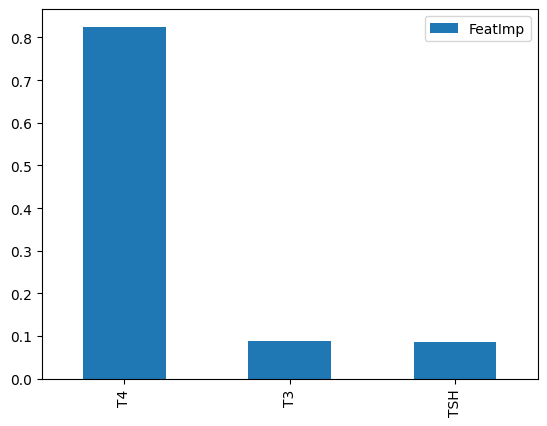

In [0]:
featimp = pd.DataFrame(model.feature_importances_)
featimp

#Plot the Feature Importance
featimp = pd.DataFrame(model.feature_importances_)
featimp = featimp.rename({0:'FeatImp'}, axis='columns')
featimp.index = ['T3','T4','TSH']
featimp = featimp.sort_values(by=['FeatImp'], ascending=False)
featimp.plot(kind='bar')

In [0]:
from mlflow.tracking import MlflowClient

mlflow.set_tracking_uri("databricks")
client = MlflowClient()

run_info = client.get_run(run_id)
experiment_id = run_info.info.experiment_id
print(f"Experiment ID: {experiment_id}")


Experiment ID: 1403228684565640


In [0]:
#print(mlflow.__version__)

In [0]:
artifacts_path = mlflow.artifacts.download_artifacts(artifact_uri=artifact_uri)
print(artifact_uri)
print(artifacts_path)

dbfs:/databricks/mlflow-tracking/1403228684565640/b57d800ade444045b87661c34dab1ada/artifacts/model
/local_disk0/repl_tmp_data/ReplId-1910e-542a9-d/tmpkmdasyu_/model


In [0]:
model_loaded = mlflow.pyfunc.load_model(
  'runs:/{run_id}/model'.format(
    run_id=run.info.run_id
  )
)

predictions_loaded = model_loaded.predict(X_test)
predictions_original = model.predict(X_test)

print(predictions_loaded)
print(predictions_original)

# The loaded model should match the original
assert(np.array_equal(predictions_loaded, predictions_original))


[ 3.9181330e-05  1.7345443e-05 -3.1793944e-04 ...  4.9973969e-05
  2.4543893e-05  6.1613463e-07]
[ 3.9181330e-05  1.7345443e-05 -3.1793944e-04 ...  4.9973969e-05
  2.4543893e-05  6.1613463e-07]


In [0]:
# artifacts_contents = dbutils.fs.ls(artifact_uri)

# for item in artifacts_contents:
#     print(item)

In [0]:
print('model_uri', model_uri)

model_uri runs:/b57d800ade444045b87661c34dab1ada/model


In [0]:
# Load the model
registered_model = mlflow.pyfunc.load_model(model_uri)

# Use the model for predictions
predictions = registered_model.predict(X_test)
print(predictions)

[ 3.9181330e-05  1.7345443e-05 -3.1793944e-04 ...  4.9973969e-05
  2.4543893e-05  6.1613463e-07]
